In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

In [110]:
convenient_global_file = Path('Resources/CONVENIENT_global_confirmed_cases.csv')
convenient_us_file = Path('Resources/CONVENIENT_us_confirmed_cases.csv')
RAW_global_file = Path('Resources/RAW_global_confirmed_cases.csv')
RAW_us_file = Path('Resources/RAW_us_confirmed_cases.csv')
RAW_us_deaths_file = Path('Resources/RAW_us_deaths.csv')
us_pop_by_state_file = Path('Resources/us_pop_by_state.csv')
world_pop_file = Path('Resources/world_population.csv')

convenient_global = pd.read_csv(convenient_global_file)
convenient_us = pd.read_csv(convenient_us_file)
RAW_global = pd.read_csv(RAW_global_file)
RAW_us = pd.read_csv(RAW_us_file)
RAW_us_deaths = pd.read_csv(RAW_us_deaths_file)
us_pop_by_state = pd.read_csv(us_pop_by_state_file)
world_pop = pd.read_csv(world_pop_file)

/var/folders/5y/rb2lb7ls0pngk3mqsdn22z4m0000gn/T/ipykernel_4712/841162714.py:10: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,

In [3]:
RAW_global.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [4]:
RAW_global.columns[0:50]

Index(['Country/Region', 'Province/State', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20'],
      dtype='object')

In [5]:
RAW_global.drop(['Province/State', 'Lat', 'Long'], axis= 1, inplace= True)
RAW_global = RAW_global.rename(columns= {'Country/Region': 'country'})
RAW_global.tail()

,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
284,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,Yemen,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,Zambia,0,0,0,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135
288,Zimbabwe,0,0,0,0,0,0,0,0,0,...,263921,264127,264127,264127,264127,264127,264127,264127,264276,264276


In [6]:
RAW_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1144 entries, country to 3/9/23
dtypes: int64(1143), object(1)
memory usage: 2.5+ MB


In [7]:
RAW_global_grouped = RAW_global.groupby(RAW_global['country']).sum()
RAW_global_grouped

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945


In [8]:
RAW_global_grouped.rename(index={'US': 'United States'}, inplace=True)

In [9]:
RAW_global_sum = RAW_global_grouped.sum(axis=1).sort_values(ascending= False)
RAW_global_sum.head()
top_50_RAW_global_sum = RAW_global_sum[0:50]

# US = 186
# India = 80
# Brazil = 24
# France = 63
# Russia - 147

In [10]:
RAW_global_grouped.columns = pd.to_datetime(RAW_global_grouped.columns)
RAW_global_grouped_year = RAW_global_grouped.loc[:,'2020-01-01':'2020-12-31']
RAW_global_grouped_year.head()
RAW_global_grouped_year_sum = RAW_global_grouped_year.sum(axis=1).sort_values(ascending= False)
top_50_RAW_global_sum = RAW_global_grouped_year_sum[0:50]

/var/folders/5y/rb2lb7ls0pngk3mqsdn22z4m0000gn/T/ipykernel_4712/1846024474.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  RAW_global_grouped.columns = pd.to_datetime(RAW_global_grouped.columns)


In [11]:
top_50_RAW_global_sum.head()

country
United States    1729026830
India            1084280238
Brazil            892348107
Russia            294103774
France            208965946
dtype: int64

In [83]:
us_pop_by_state.head()

,rank,state,state_code,2020_census,percent_of_total
0,1.0,California,CA,39538223,0.1191
1,2.0,Texas,TX,29145505,0.0874
2,3.0,Florida,FL,21538187,0.0647
3,4.0,New York,NY,20201249,0.0586
4,5.0,Pennsylvania,PA,13002700,0.0386


In [84]:
us_pop_by_state.drop(columns= {'rank', 'state_code', 'percent_of_total'}, inplace= True)

In [85]:
us_pop_by_state.drop(index= {48,51}, inplace= True)
us_pop_by_state.reset_index(drop= True, inplace= True)
us_pop_by_state

,state,2020_census
0,California,39538223
1,Texas,29145505
2,Florida,21538187
3,New York,20201249
4,Pennsylvania,13002700
5,Illinois,12801989
6,Ohio,11799448
7,Georgia,10711908
8,North Carolina,10439388
9,Michigan,10077331


In [86]:
us_pop_by_state.rename(columns= {
    'state':'Province_State',
    '2020_census':'Population'
},inplace= True) 
us_pop_by_state.head()

,Province_State,Population
0,California,39538223
1,Texas,29145505
2,Florida,21538187
3,New York,20201249
4,Pennsylvania,13002700


In [111]:
world_pop.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [112]:
world_pop.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [ ]:
world_pop.drop(columns= {'Rank', 'CCA3', 'Capital', 'Continent',
       '2022 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'}, inplace= True)

In [125]:
world_pop.rename(columns= {
    'Country/Territory':'country'
}, inplace= True)
world_pop.head()

,country,2020 Population
0,Afghanistan,38972230
1,Albania,2866849
2,Algeria,43451666
3,American Samoa,46189
4,Andorra,77700


In [126]:
world_pop.rename(columns= {
    '2020 Population':'Population'
}, inplace= True)
world_pop.head()

,country,Population
0,Afghanistan,38972230
1,Albania,2866849
2,Algeria,43451666
3,American Samoa,46189
4,Andorra,77700


In [118]:
top_50_RAW_global_sum_df = pd.DataFrame(top_50_RAW_global_sum)
top_50_RAW_global_sum_df.rename(columns= {
    0:'Number of cases'
}, inplace= True)

In [119]:
renamed_top_50_RAW_global_sum_df = top_50_RAW_global_sum_df.reset_index()
renamed_top_50_RAW_global_sum_df.head()

,country,Number of cases
0,United States,1729026830
1,India,1084280238
2,Brazil,892348107
3,Russia,294103774
4,France,208965946


In [128]:
merged_pop_df = pd.merge(renamed_top_50_RAW_global_sum_df, world_pop, on= 'country', how="left")
merged_pop_df

,country,Number of cases,Population
0,United States,1729026830,3.359420e+08
1,India,1084280238,1.396387e+09
2,Brazil,892348107,2.131963e+08
3,Russia,294103774,1.456173e+08
4,France,208965946,6.448005e+07
5,Spain,186518146,4.736381e+07
6,United Kingdom,173654605,6.705947e+07
7,Colombia,155342636,5.093066e+07
8,Italy,151300759,5.950058e+07
9,Mexico,149022213,1.259983e+08


In [134]:
merged_pop_df_filled = merged_pop_df.fillna(10530953)

In [135]:
merged_pop_df_filled

,country,Number of cases,Population
0,United States,1729026830,3.359420e+08
1,India,1084280238,1.396387e+09
2,Brazil,892348107,2.131963e+08
3,Russia,294103774,1.456173e+08
4,France,208965946,6.448005e+07
5,Spain,186518146,4.736381e+07
6,United Kingdom,173654605,6.705947e+07
7,Colombia,155342636,5.093066e+07
8,Italy,151300759,5.950058e+07
9,Mexico,149022213,1.259983e+08


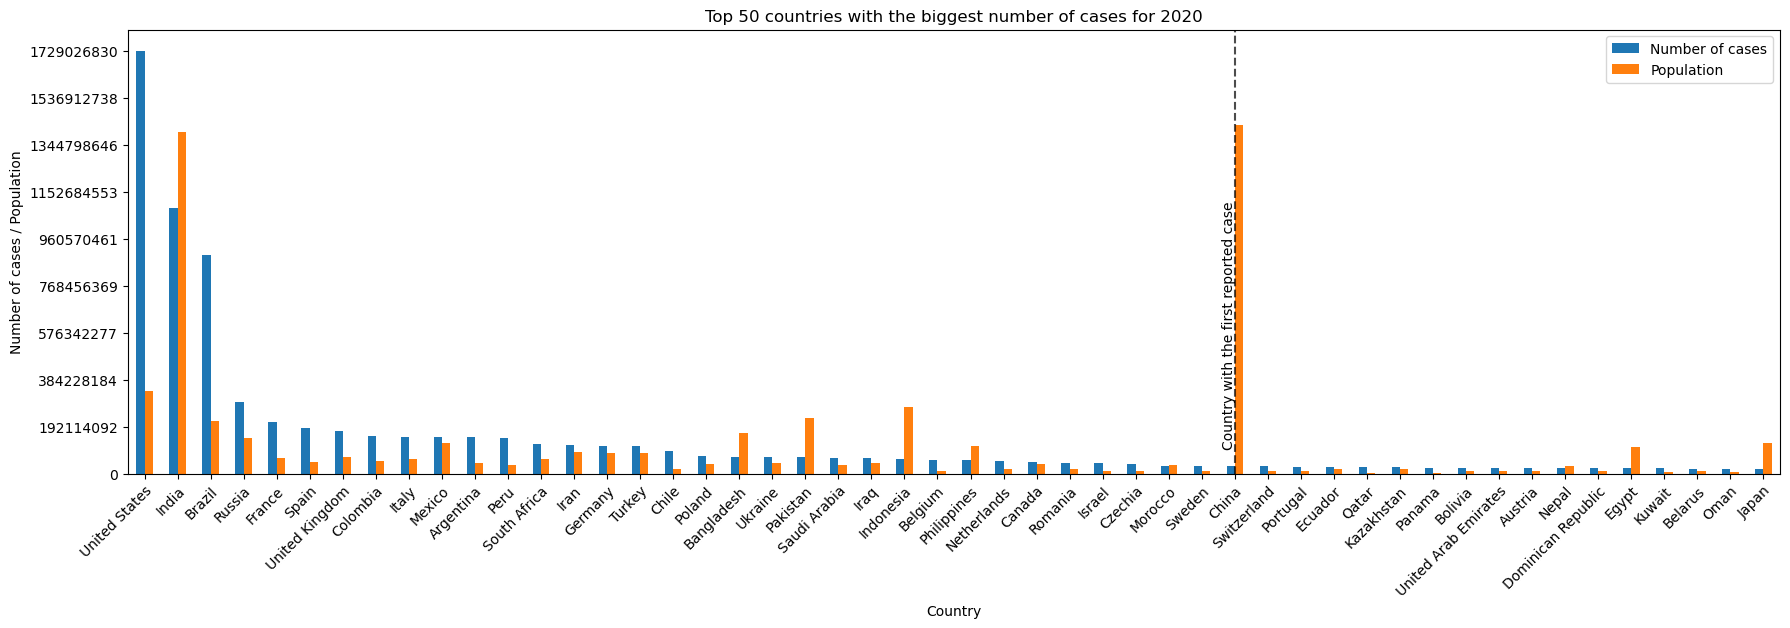

In [147]:
fig1 = merged_pop_df_filled.plot(kind= 'bar', figsize=(18,6),
                    title="Top 50 countries with the biggest number of cases for 2020",
                    xlabel="Country",
                    ylabel="Number of cases / Population")
fig1.set_xticklabels(top_50_RAW_global_sum.index, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

num_ticks = 10
ticks = np.linspace(0, top_50_RAW_global_sum['United States'], num_ticks)

plt.yticks(ticks)

plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_useOffset(False)

plt.axvline(x=33, color="black", linestyle="dashed", alpha=0.7)
plt.text(33-0.4, 1e8, "Country with the first reported case", rotation=90, verticalalignment="bottom")

plt.tight_layout()
plt.show()

In [13]:
RAW_global_grouped_2020 = RAW_global_grouped.loc[:,'2020-01-01':'2020-12-31']
RAW_global_grouped_2020_sum = RAW_global_grouped_2020.sum(axis=1).sort_values(ascending= False)
RAW_global_grouped_2020_sum.head()

country
United States    1729026830
India            1084280238
Brazil            892348107
Russia            294103774
France            208965946
dtype: int64

In [14]:
RAW_global_grouped_2020.head(2)

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,50888,51070,51357,51595,51764,51848,52007,52147,52330,52330
Albania,0,0,0,0,0,0,0,0,0,0,...,53814,54317,54827,55380,55755,56254,56572,57146,57727,58316


In [15]:
new_RAW_global_grouped_2020 = RAW_global_grouped_2020.reset_index()
new_RAW_global_grouped_2020.loc[new_RAW_global_grouped_2020['country'] == 'France']

,country,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-12-22 00:00:00,2020-12-23 00:00:00,2020-12-24 00:00:00,2020-12-25 00:00:00,2020-12-26 00:00:00,2020-12-27 00:00:00,2020-12-28 00:00:00,2020-12-29 00:00:00,2020-12-30 00:00:00,2020-12-31 00:00:00
63,France,0,0,2,3,3,3,4,5,5,...,2547618,2562604,2584322,2604584,2607677,2616544,2619650,2631144,2657658,2677660


In [16]:
# US = 186
# India = 80
# Brazil = 24
# France = 63
# Russia - 147

In [17]:
RAW_global_grouped_newIndex = RAW_global_grouped.reset_index()
top_5_RAW_df = RAW_global_grouped_newIndex.iloc[[24,63,80,147, 186]]
top_5_RAW_df= top_5_RAW_df.set_index(top_5_RAW_df['country']).drop('country', axis= 1)
top_5_RAW_df.columns = pd.to_datetime(top_5_RAW_df.columns)
top_5_RAW_df.reset_index()
top_5_year = top_5_RAW_df.loc[:,'2020-01-01':'2020-12-31']
top_5_year

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
country,,,,,,,,,,,,,,,,,,,,,
Brazil,0,0,0,0,0,0,0,0,0,0,...,7326935,7372614,7430825,7452008,7469541,7487155,7514592,7570963,7626563,7681032
France,0,0,2,3,3,3,4,5,5,5,...,2547618,2562604,2584322,2604584,2607677,2616544,2619650,2631144,2657658,2677660
India,0,0,0,0,0,0,0,0,1,1,...,10099066,10123778,10146845,10169118,10187850,10207871,10224303,10244852,10266674,10286709
Russia,0,0,0,0,0,0,0,0,0,2,...,2878382,2905196,2934695,2963290,2992123,3019972,3047335,3073923,3100018,3127347
United States,1,1,2,2,5,5,5,6,6,8,...,18393673,18614460,18826055,18951579,19169547,19305730,19480363,19687204,19905952,20219878


In [18]:
top_5_year.shape

(5, 345)

In [20]:
top_5_year.head().T

country,Brazil,France,India,Russia,United States
2020-01-22,0,0,0,0,1
2020-01-23,0,0,0,0,1
2020-01-24,0,2,0,0,2
2020-01-25,0,3,0,0,2
2020-01-26,0,3,0,0,5
...,...,...,...,...,...
2020-12-27,7487155,2616544,10207871,3019972,19305730
2020-12-28,7514592,2619650,10224303,3047335,19480363
2020-12-29,7570963,2631144,10244852,3073923,19687204
2020-12-30,7626563,2657658,10266674,3100018,19905952


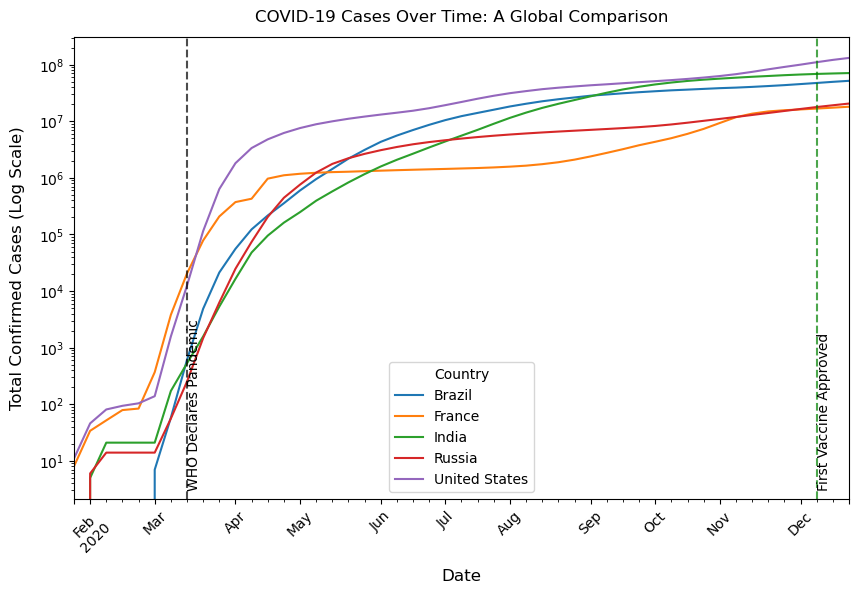

In [65]:
d = top_5_year.T
d = d.resample('W').sum()
d.plot(figsize=(10, 6))

plt.xticks(rotation=45)
plt.xlabel("Date", fontsize=12, labelpad=10)
plt.ylabel("Total Confirmed Cases (Log Scale)", fontsize=12, labelpad=10)
plt.title("COVID-19 Cases Over Time: A Global Comparison", fontsize=12, pad=11)
plt.legend(title="Country")
plt.xlim(pd.to_datetime("2020-01-26"), pd.to_datetime("2020-12-27"))
plt.yscale('log')



plt.axvline(x="2020-03-11", color="black", linestyle="dashed", alpha=0.7)
plt.text("2020-03-11", 3, "WHO Declares Pandemic", rotation=90, verticalalignment="bottom")

plt.axvline(x="2020-12-11", color="green", linestyle="dashed", alpha=0.7)
plt.text("2020-12-11", 3, "First Vaccine Approved", rotation=90, verticalalignment="bottom")

plt.show()

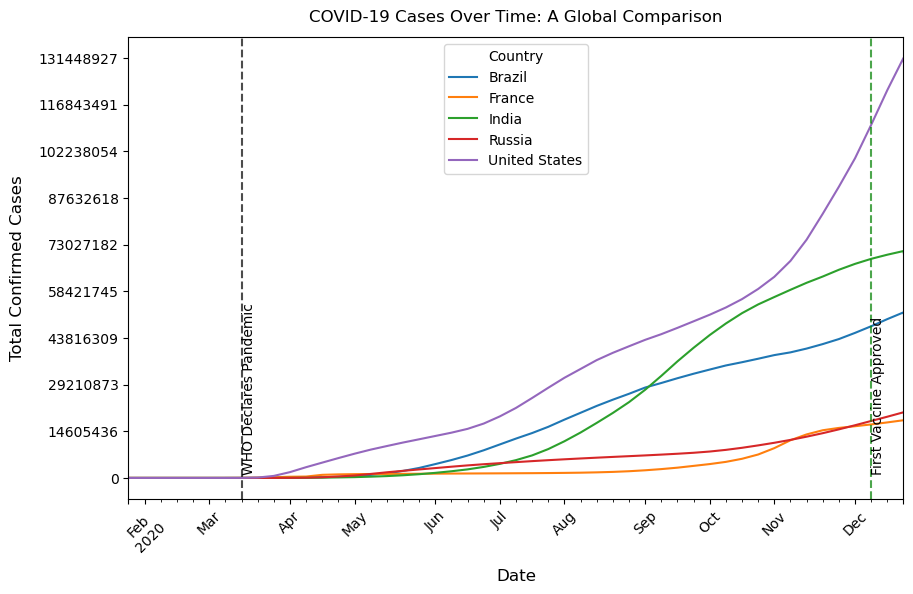

In [ ]:
d = top_5_year.T
d = d.resample('W').sum()
d.plot(figsize=(10, 6))

plt.xticks(rotation=45)
plt.xlabel("Date", fontsize=12, labelpad=10)
plt.ylabel("Total Confirmed Cases", fontsize=12, labelpad=10)
plt.title("COVID-19 Cases Over Time: A Global Comparison", fontsize=12, pad=11)

num_ticks = 10
ticks = np.linspace(0, d['United States'].max(), num_ticks)

plt.yticks(ticks)

plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_useOffset(False)

plt.legend(title="Country")

plt.xlim(pd.to_datetime("2020-01-26"), pd.to_datetime("2020-12-27"))

plt.axvline(x="2020-03-11", color="black", linestyle="dashed", alpha=0.7)
plt.text("2020-03-11", 1e6, "WHO Declares Pandemic", rotation=90, verticalalignment="bottom")

plt.axvline(x="2020-12-11", color="green", linestyle="dashed", alpha=0.7)
plt.text("2020-12-11", 1e6, "First Vaccine Approved", rotation=90, verticalalignment="bottom")

plt.show() 

In [28]:
RAW_us.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


In [29]:
RAW_us.columns[0:50]

Index(['Province_State', 'Admin2', 'UID', 'iso2', 'iso3', 'code3', 'FIPS',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20'],
      dtype='object')

In [30]:
RAW_us.drop(['Admin2', 'UID', 'iso2', 'iso3', 'code3', 'FIPS',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis= 1, inplace= True)
RAW_us.head()

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Alabama,0,0,0,0,0,0,0,0,0,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,Alabama,0,0,0,0,0,0,0,0,0,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,Alabama,0,0,0,0,0,0,0,0,0,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,Alabama,0,0,0,0,0,0,0,0,0,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,Alabama,0,0,0,0,0,0,0,0,0,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


In [31]:
RAW_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Columns: 1144 entries, Province_State to 3/9/23
dtypes: int64(1143), object(1)
memory usage: 29.2+ MB


In [32]:
grouped_RAW_us = RAW_us.groupby(RAW_us['Province_State']).sum()
grouped_RAW_us.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,1638348,1642062,1642062,1642062,1642062,1642062,1642062,1642062,1644533,1644533
Alaska,0,0,0,0,0,0,0,0,0,0,...,307073,307073,307073,307073,307073,307073,307073,307655,307655,307655
American Samoa,0,0,0,0,0,0,0,0,0,0,...,8320,8320,8320,8320,8320,8320,8320,8320,8320,8320
Arizona,0,0,0,0,1,1,1,1,1,1,...,2434631,2440294,2440294,2440294,2440294,2440294,2440294,2440294,2443514,2443514
Arkansas,0,0,0,0,0,0,0,0,0,0,...,1004752,1004752,1005212,1005464,1005790,1005847,1005930,1006336,1006622,1006883


In [33]:
grouped_RAW_us.columns = pd.to_datetime(grouped_RAW_us.columns)
sorted_grouped_RAW_us = grouped_RAW_us.loc[:,'2020-01-01':'2020-12-31']
sorted_grouped_RAW_us.index[0:60]

/var/folders/5y/rb2lb7ls0pngk3mqsdn22z4m0000gn/T/ipykernel_4712/248890341.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  grouped_RAW_us.columns = pd.to_datetime(grouped_RAW_us.columns)


Index(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Diamond Princess',
       'District of Columbia', 'Florida', 'Georgia', 'Grand Princess', 'Guam',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object', name='Province_State')

In [34]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas','California', 'Colorado', 'Connecticut', 'Delaware',
        'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming']

print(len(states))

50


In [35]:
states_data_df = sorted_grouped_RAW_us.loc[states]
reshaped_states_data_df = states_data_df.T.resample('W').sum()

In [36]:
reshaped_states_data_df.head()

Province_State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2020-01-26,0,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,5,0,0,0
2020-02-02,0,0,7,0,17,0,0,0,0,0,...,0,0,0,0,0,0,7,0,0,0
2020-02-09,0,0,7,0,42,0,0,0,0,0,...,0,0,0,0,0,0,7,0,0,0
2020-02-16,0,0,7,0,52,0,0,0,0,0,...,0,0,0,0,0,0,7,0,0,0
2020-02-23,0,0,7,0,69,0,0,0,0,0,...,0,0,0,0,0,0,7,0,0,0


In [37]:
reshaped_states_data_df.max()

Province_State
Alabama            2359525
Alaska              314928
Arizona            3356465
Arkansas           1469354
California        14805581
Colorado           2416070
Connecticut        1198014
Delaware            371112
Florida            8701654
Georgia            4304538
Hawaii              148250
Idaho               939924
Illinois           6462454
Indiana            3373409
Iowa               1909161
Kansas             1476571
Kentucky           1755100
Louisiana          2061374
Maine               145719
Maryland           1822858
Massachusetts      2380724
Michigan           3563743
Minnesota          2827253
Mississippi        1411756
Missouri           2918892
Montana             550864
Nebraska           1119919
Nevada             1482257
New Hampshire       278437
New Jersey         3473112
New Mexico          943107
New York           6298740
North Carolina     3486840
North Dakota        633406
Ohio               4553701
Oklahoma           1900125
Oregon       

Colors applied to the lines: ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'black', 'green']


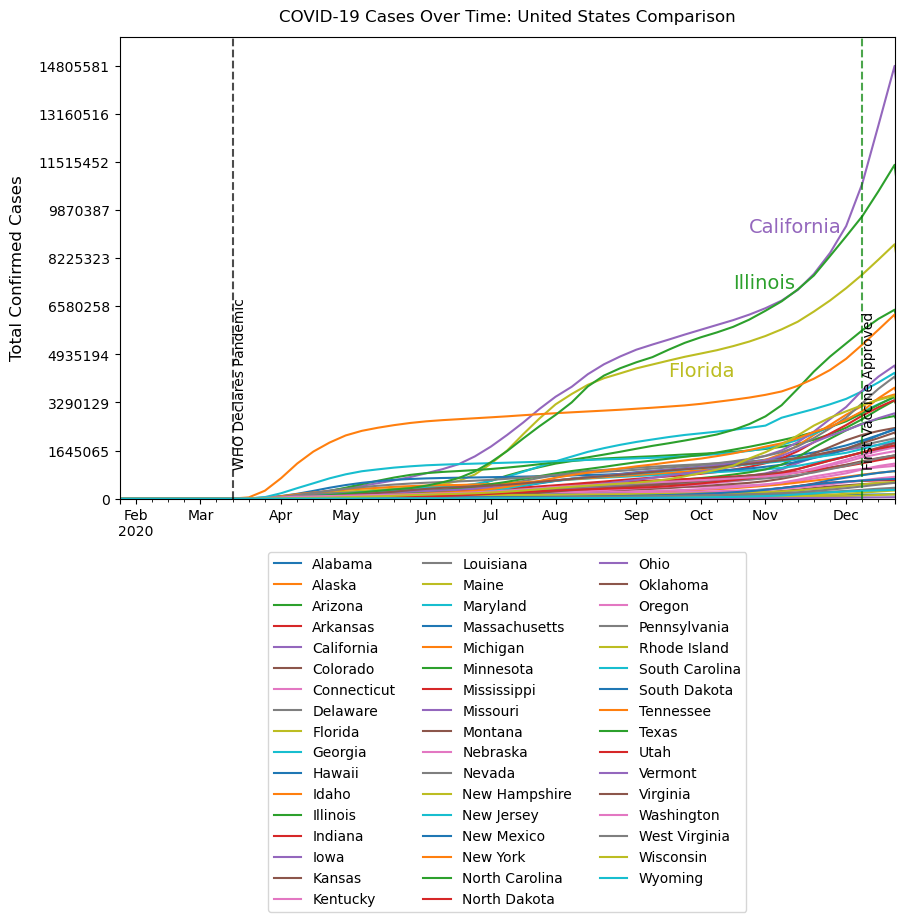

In [38]:
fig = reshaped_states_data_df.plot(figsize=(10,6))
plt.legend(ncol=2)  
plt.legend(ncol=3, fontsize=10, loc="upper right") 
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.ylabel("Total Confirmed Cases", fontsize=12, labelpad=10)
plt.title("COVID-19 Cases Over Time: United States Comparison", fontsize=12, pad=11)

plt.xlim(pd.to_datetime("2020-01-26"), pd.to_datetime("2020-12-26"))
plt.ylim(0, 14805581+1000000)

num_ticks = 10
ticks = np.linspace(0, reshaped_states_data_df['California'].max(), num_ticks)

plt.yticks(ticks)

plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_useOffset(False)

plt.text('2020-10-25', 9100000, 'California', fontsize=14, color='#9467bd') 
plt.text('2020-10-18', 7200000, 'Illinois', fontsize=14, color='#2ca02c')
plt.text('2020-09-19', 4200000, 'Florida', fontsize=14, color='#bcbd22')

plt.axvline(x="2020-03-11", color="black", linestyle="dashed", alpha=0.7)
plt.text("2020-03-11", 1e6, "WHO Declares Pandemic", rotation=90, verticalalignment="bottom")

plt.axvline(x="2020-12-11", color="green", linestyle="dashed", alpha=0.7)
plt.text("2020-12-11", 1e6, "First Vaccine Approved", rotation=90, verticalalignment="bottom")

colors = [line.get_color() for line in fig.lines]
print("Colors applied to the lines:", colors)
plt.show()

In [39]:
list_states_data_df = states_data_df.sum(axis=1).sort_values(ascending= False)
list_states_data_df.head()

# California - 4
# Texas - 42
# Florida - 8
# New York - 31
# Illinois - 12

Province_State
California    177601991
Texas         157251331
Florida       138120398
New York      126274451
Illinois       81872140
dtype: int64

In [95]:
new_list_states_data_df = pd.DataFrame(list_states_data_df)
renamed_new_list_states_data_df = new_list_states_data_df.rename(columns= {
    0: 'Number of cases'
})
renamed_new_list_states_data_df.reset_index(inplace= True)
renamed_new_list_states_data_df.head()


,Province_State,Number of cases
0,California,177601991
1,Texas,157251331
2,Florida,138120398
3,New York,126274451
4,Illinois,81872140


In [94]:
us_pop_by_state.head()

,Province_State,Population
0,California,39538223
1,Texas,29145505
2,Florida,21538187
3,New York,20201249
4,Pennsylvania,13002700


In [97]:
merged_df = pd.merge(renamed_new_list_states_data_df, us_pop_by_state, on= 'Province_State')
merged_df.head()

,Province_State,Number of cases,Population
0,California,177601991,39538223
1,Texas,157251331,29145505
2,Florida,138120398,21538187
3,New York,126274451,20201249
4,Illinois,81872140,12801989


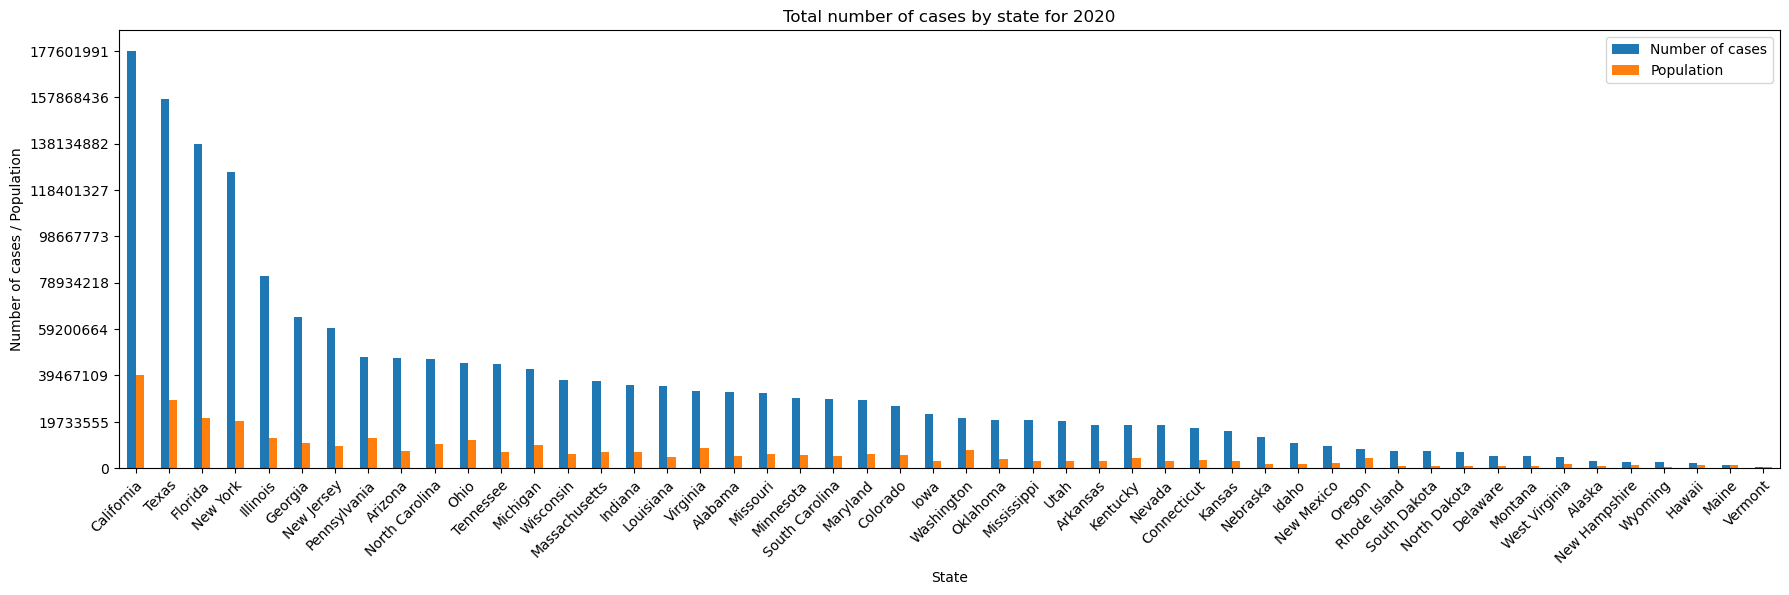

<Figure size 640x480 with 0 Axes>

In [109]:
fig2 = merged_df.plot(kind= 'bar', figsize=(18,6),
                    title="Total number of cases by state for 2020",
                    xlabel="State",
                    ylabel="Number of cases / Population")
fig2.set_xticklabels(list_states_data_df.index, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

num_ticks = 10
ticks = np.linspace(0, list_states_data_df['California'], num_ticks)

plt.yticks(ticks)

plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_useOffset(False)

plt.tight_layout()
plt.show()

plt.tight_layout()

In [43]:
new_2_states_data_df = states_data_df.reset_index()
new_2_states_data_df.loc[new_2_states_data_df['Province_State'] == 'Illinois']

,Province_State,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-12-22 00:00:00,2020-12-23 00:00:00,2020-12-24 00:00:00,2020-12-25 00:00:00,2020-12-26 00:00:00,2020-12-27 00:00:00,2020-12-28 00:00:00,2020-12-29 00:00:00,2020-12-30 00:00:00,2020-12-31 00:00:00
12,Illinois,0,0,1,1,1,1,1,1,1,...,911308,918070,925107,930849,934142,937909,942362,948006,955380,963389


In [44]:
states_data_df_newIndex = states_data_df.reset_index()
top_5_states_RAW_df = new_2_states_data_df.iloc[[4,8,12,31,42]]
top_5_states_df= top_5_states_RAW_df.set_index(top_5_states_RAW_df['Province_State']).drop('Province_State', axis= 1)
top_5_states_df.columns = pd.to_datetime(top_5_states_df.columns)
top_5_states_df.reset_index()
top_5_states_year = top_5_states_df.loc[:,'2020-01-01':'2020-12-31']
top_5_states_year

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
Province_State,,,,,,,,,,,,,,,,,,,,,
California,0,0,0,0,2,2,2,2,2,3,...,2035315,2075986,2120381,2147293,2198925,2231986,2269314,2306370,2327256,2384723
Florida,0,0,0,0,0,0,0,0,0,0,...,1223015,1234399,1247546,1247546,1264588,1271979,1280177,1292252,1306123,1323315
Illinois,0,0,1,1,1,1,1,1,1,2,...,911308,918070,925107,930849,934142,937909,942362,948006,955380,963389
New York,0,0,0,0,0,0,0,0,0,0,...,876281,886813,899837,912885,924014,932022,940290,950473,963390,978783
Texas,0,0,0,0,0,0,0,0,0,0,...,1600102,1619562,1635372,1650721,1664167,1673844,1689434,1715547,1734592,1805998


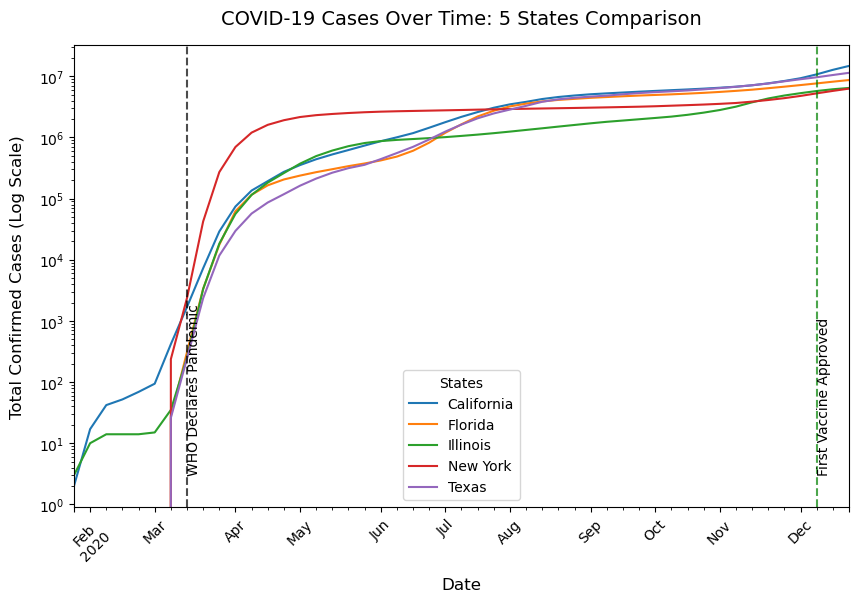

In [67]:
s = top_5_states_year.T
s = s.resample('W').sum()
s.plot(figsize=(10, 6))

plt.xticks(rotation=45)
plt.xlabel("Date", fontsize=12, labelpad=10)
plt.ylabel("Total Confirmed Cases (Log Scale)", fontsize=12, labelpad=10)
plt.title("COVID-19 Cases Over Time: 5 States Comparison", fontsize=14, pad=15)

plt.legend(title="States")

plt.xlim(pd.to_datetime("2020-01-22"), pd.to_datetime("2020-12-27"))
plt.yscale('log')

plt.axvline(x="2020-03-11", color="black", linestyle="dashed", alpha=0.7)
plt.text("2020-03-11", 3, "WHO Declares Pandemic", rotation=90, verticalalignment="bottom")

plt.axvline(x="2020-12-11", color="green", linestyle="dashed", alpha=0.7)
plt.text("2020-12-11", 3, "First Vaccine Approved", rotation=90, verticalalignment="bottom")

plt.show()